In [1]:
# Example credit to: scikit-opt

from scipy import spatial
import numpy as np
import matplotlib.pyplot as plt
from sko.SA import SA_TSP

num_points = 20
dataset_size = 1    # Single set of coords
tsp_size = 20
points_coordinates = np.random.uniform(size=(dataset_size, tsp_size, 2))
distance_matrix = spatial.distance.cdist(points_coordinates[0], points_coordinates[0], metric='euclidean')

In [2]:
def cal_total_distance(routine):
    '''Get the total distance between all nodes
    '''
    num_points, = routine.shape
    return sum([distance_matrix[routine[i % num_points], routine[(i + 1) % num_points]] for i in range(num_points)])

In [3]:
import time

# Initialise SA, using euclidean distance as objective function
sa_tsp = SA_TSP(func=cal_total_distance, x0=range(num_points), T_max=50, T_min=1, L=10*num_points)

# Run SA and report total time as well as final distance
start_time = time.time()
best_points, best_distance = sa_tsp.run()
print("--- %s seconds ---" % (time.time() - start_time))
print(best_points, best_distance, cal_total_distance(best_points))

--- 4.622516393661499 seconds ---
[ 4 17  5  8 15  9  7 13 10  3  2 16  1 11 14 19 12 18  0  6] 6.598309174664697 6.598309174664697


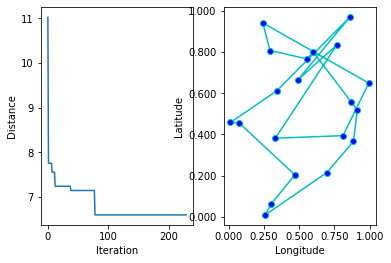

In [4]:
from matplotlib.ticker import FormatStrFormatter

fig, ax = plt.subplots(1, 2)

best_points_ = np.concatenate([best_points, [best_points[0]]])
best_points_coordinate = points_coordinates[0][best_points_, :]
ax[0].plot(sa_tsp.best_y_history)
ax[0].set_xlabel("Iteration")
ax[0].set_ylabel("Distance")
ax[1].plot(best_points_coordinate[:, 0], best_points_coordinate[:, 1],
           marker='o', markerfacecolor='b', color='c', linestyle='-')
ax[1].xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax[1].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax[1].set_xlabel("Longitude")
ax[1].set_ylabel("Latitude")
plt.show()